In [1]:
import beamtest_analysis_helper as helper
from glob import glob
import pandas

In [2]:
chip_labels = [0]
chip_figtitles = ['ET2 EPIR FBK UFSD4 W10 5-5']
chip_fignames = chip_figtitles
chip_names = chip_figtitles
fig_path = './'

In [3]:
files = glob('/run/media/daq/T7/2023-10-28_Array_Test_Results/*/*.dat')
#df = helper.toSingleDataFrame(files=files)
helper.toSingleDataFramePerDirectory('/run/media/daq/T7/2023-10-28_Array_Test_Results', 'SelfTrigger_ET2_EPIR_Pair3_HV300_Readout_offset10_lowpower_cosmics_loop_*')

['/run/media/daq/T7/2023-10-28_Array_Test_Results/SelfTrigger_ET2_EPIR_Pair3_HV300_Readout_offset10_lowpower_cosmics_loop_0', '/run/media/daq/T7/2023-10-28_Array_Test_Results/SelfTrigger_ET2_EPIR_Pair3_HV300_Readout_offset10_lowpower_cosmics_loop_1', '/run/media/daq/T7/2023-10-28_Array_Test_Results/SelfTrigger_ET2_EPIR_Pair3_HV300_Readout_offset10_lowpower_cosmics_loop_2', '/run/media/daq/T7/2023-10-28_Array_Test_Results/SelfTrigger_ET2_EPIR_Pair3_HV300_Readout_offset10_lowpower_cosmics_loop_3', '/run/media/daq/T7/2023-10-28_Array_Test_Results/SelfTrigger_ET2_EPIR_Pair3_HV300_Readout_offset10_lowpower_cosmics_loop_4', '/run/media/daq/T7/2023-10-28_Array_Test_Results/SelfTrigger_ET2_EPIR_Pair3_HV300_Readout_offset10_lowpower_cosmics_loop_5', '/run/media/daq/T7/2023-10-28_Array_Test_Results/SelfTrigger_ET2_EPIR_Pair3_HV300_Readout_offset10_lowpower_cosmics_loop_6', '/run/media/daq/T7/2023-10-28_Array_Test_Results/SelfTrigger_ET2_EPIR_Pair3_HV300_Readout_offset10_lowpower_cosmics_loop_7',

In [27]:
df.to_csv('ET2_EPIR_FBK_UFSD4_W10_5-5_single_cosmic.csv', index=False)

In [28]:
df

""


In [24]:
df = pandas.read_csv('ET2_EPIR_FBK_UFSD4_W10_5-5_single_cosmic.csv')

EmptyDataError: No columns to parse from file

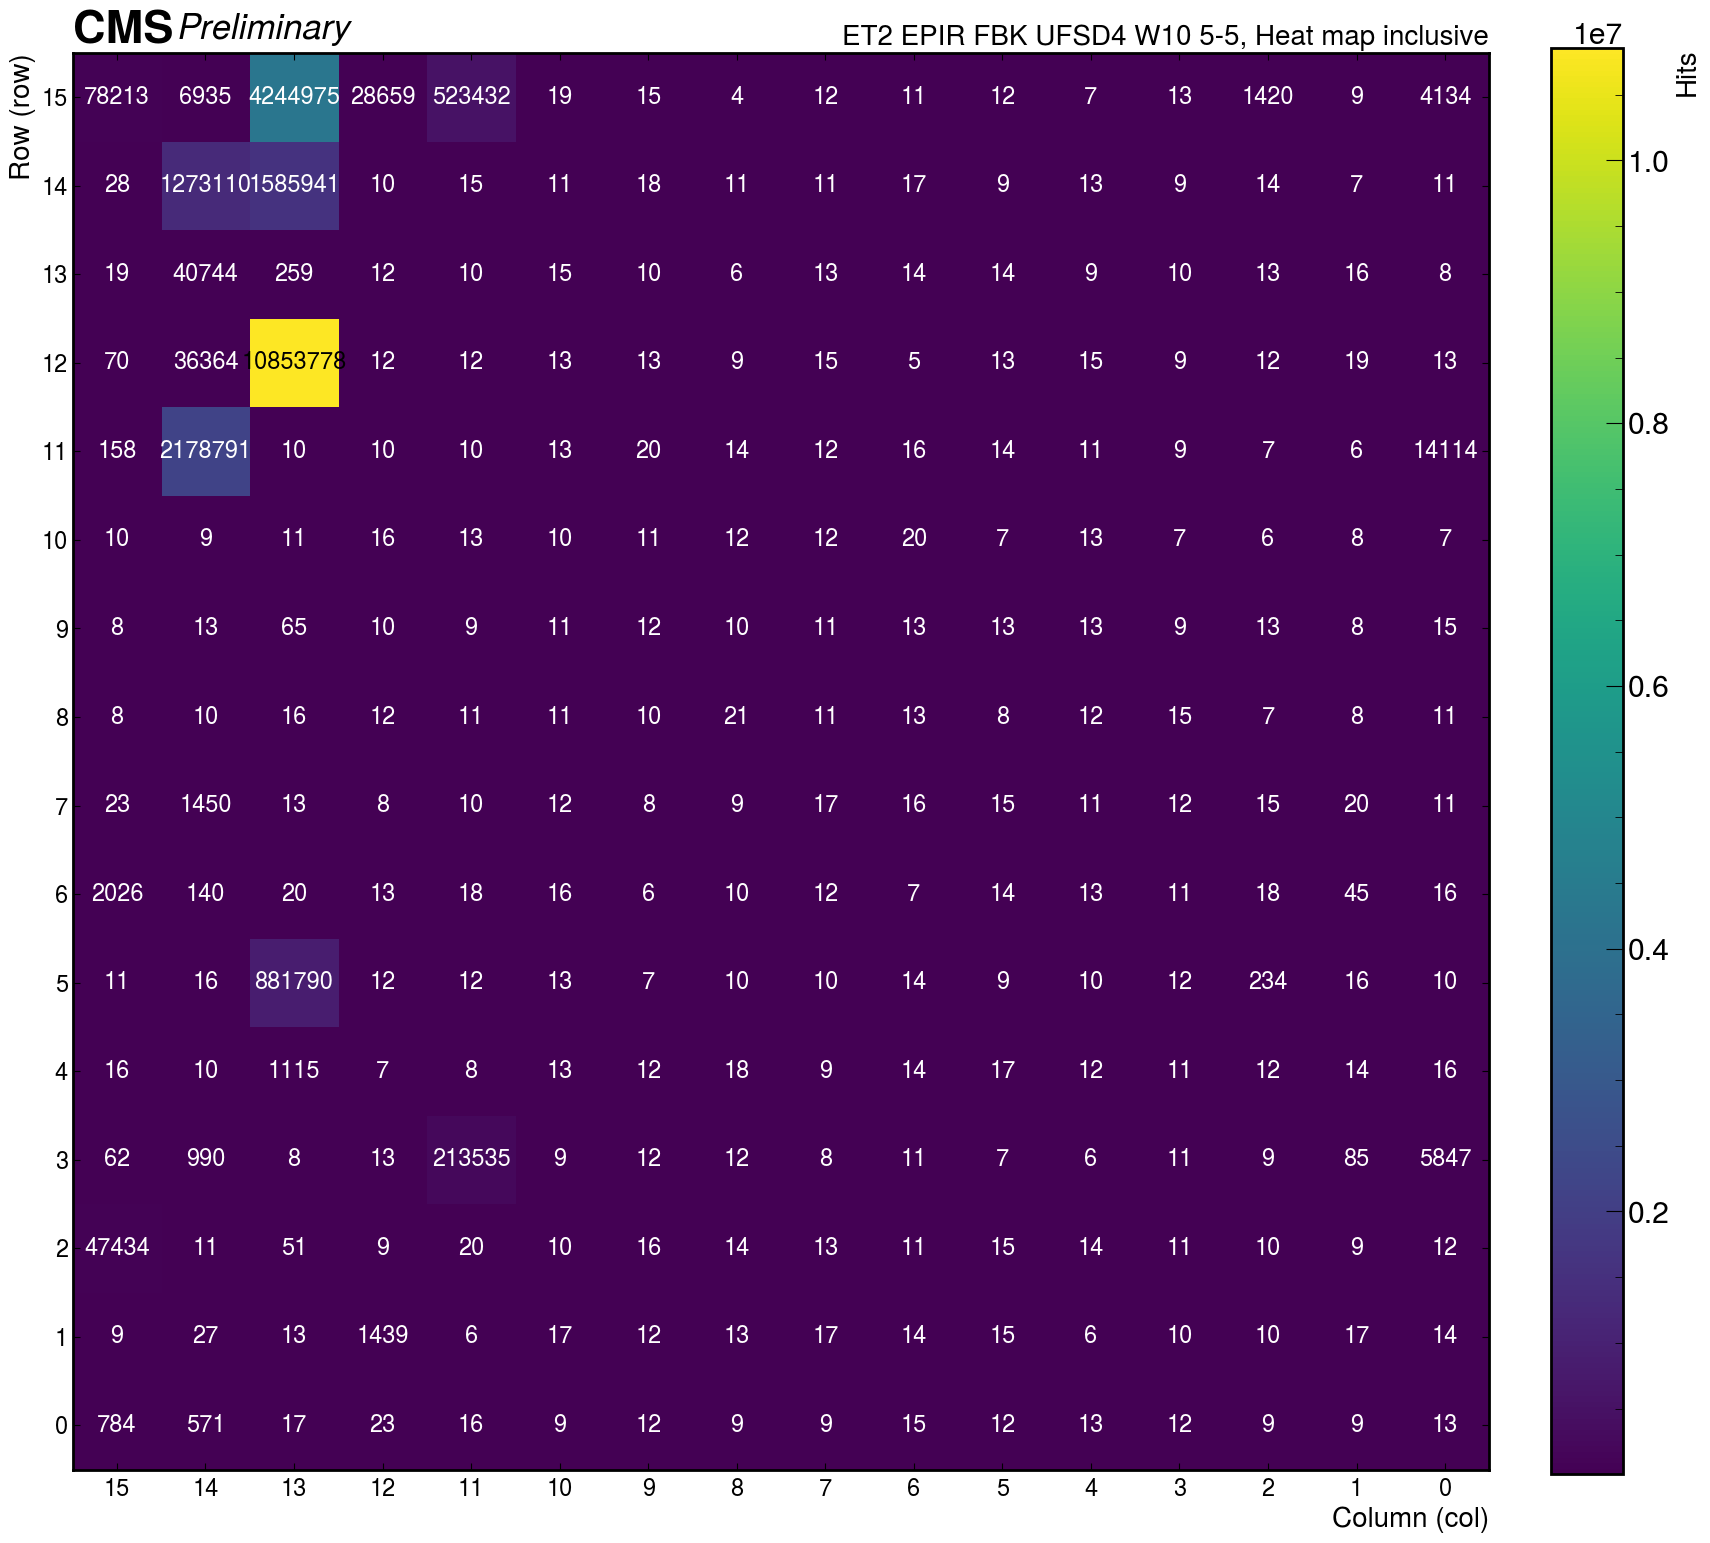

In [7]:
helper.making_heatmap_byPandas(df, chip_labels, chip_figtitles, "inclusive")

In [6]:
h_inclusive = helper.return_hist(df, chip_names, chip_labels)

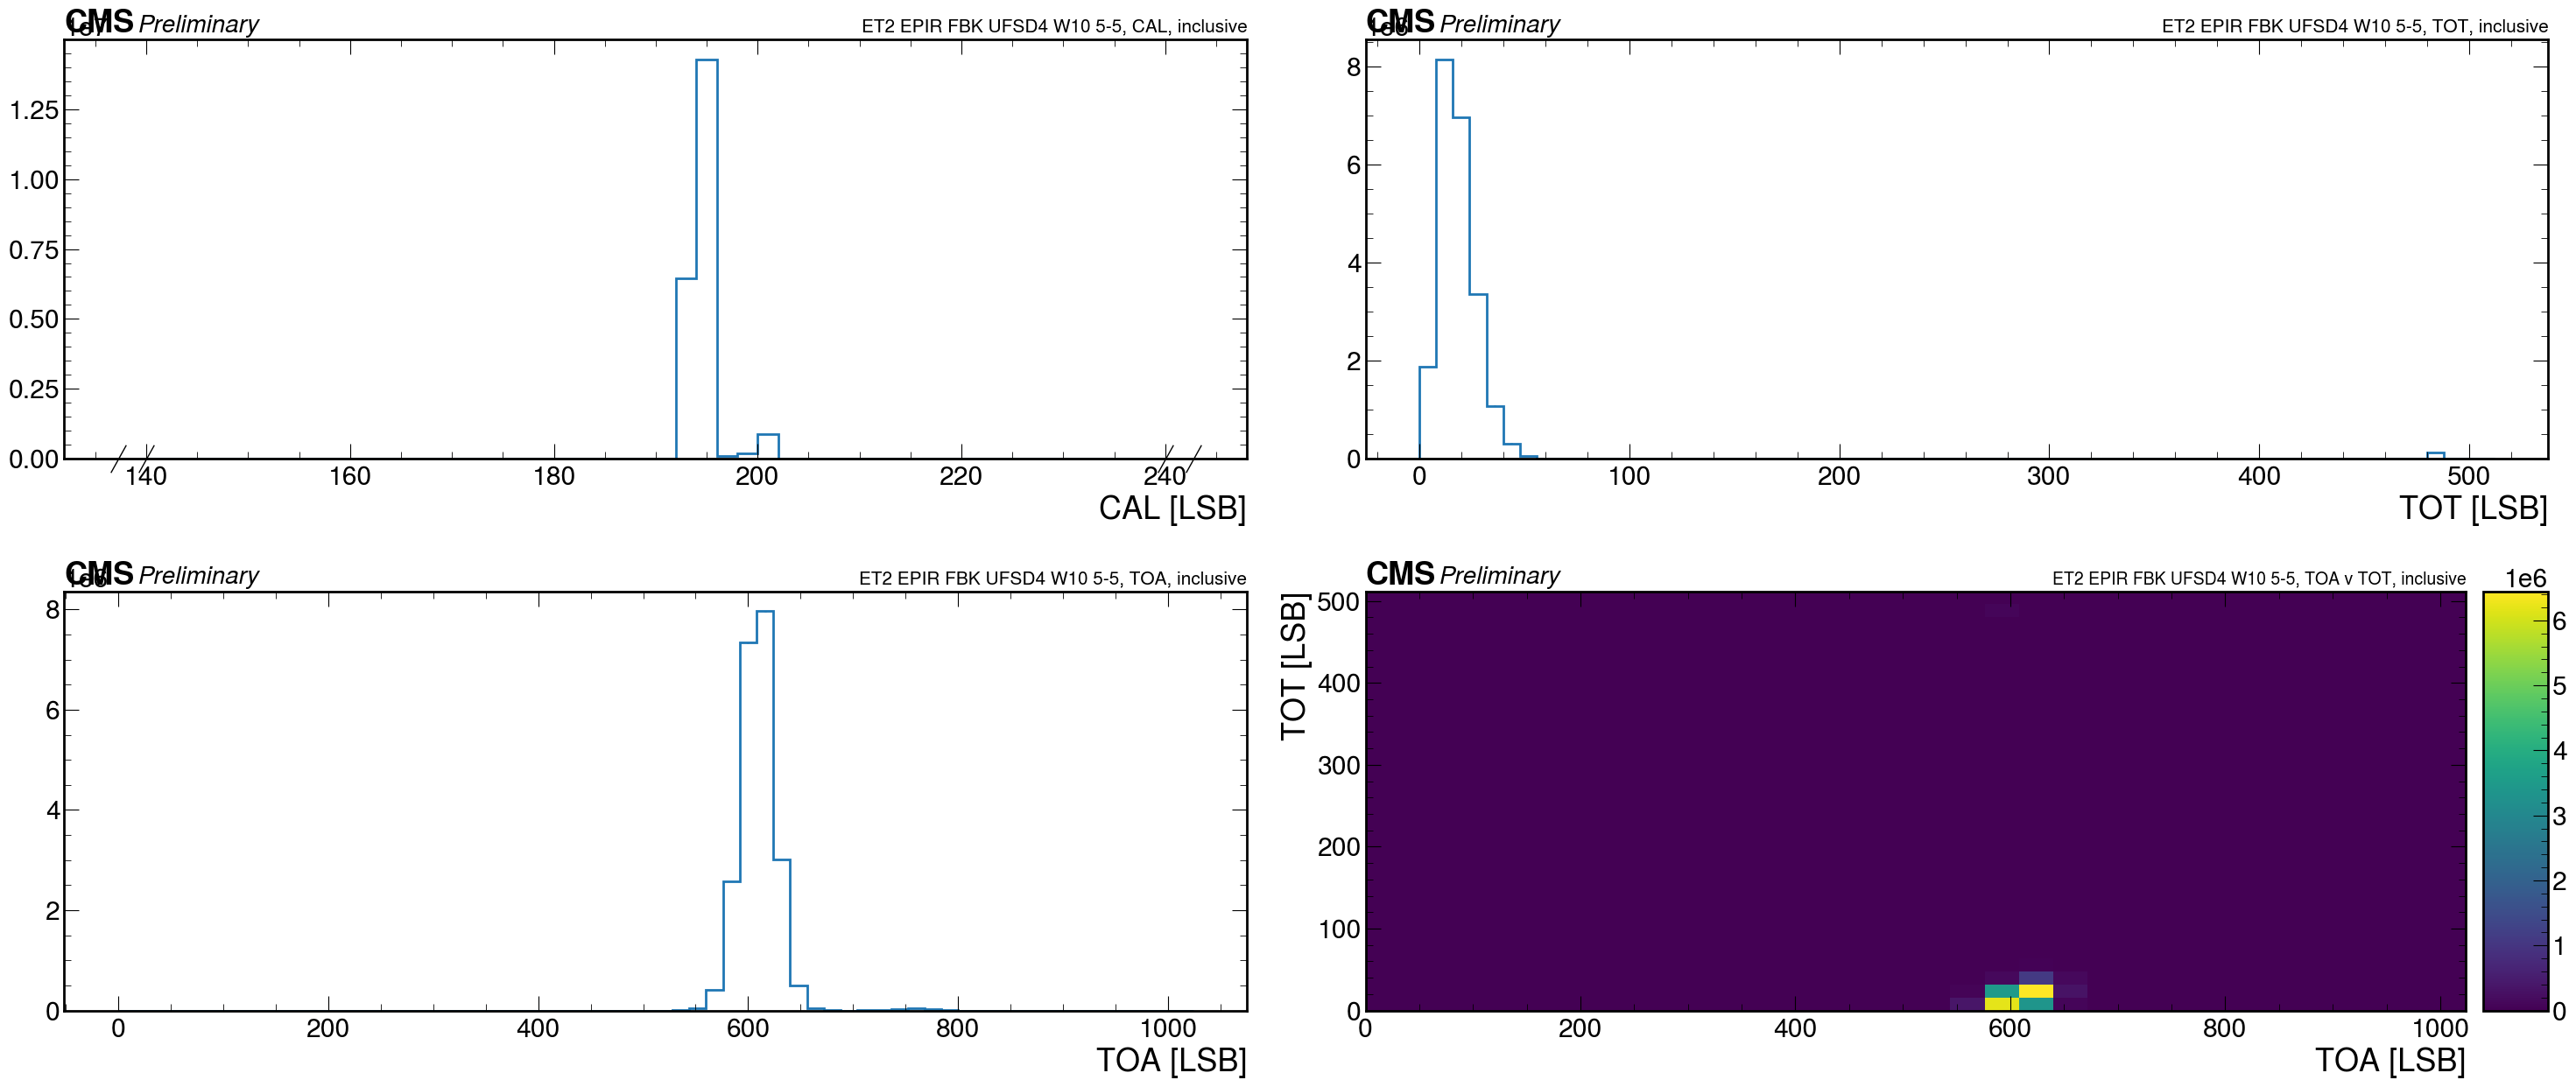

In [7]:
helper.make_pix_inclusive_plots(h_inclusive, chip_names[0], chip_fignames[0], chip_figtitles[0], 
                                fig_path, save=False, show=True, tag="inclusive", title_tag=", inclusive", slide_friendly=True)

In [11]:
pix_dict = {
    # board ID: [row, col]
    0: [ 1, 0],
    1: [ 1, 1],
    2: [ 1, 2],
    3: [ 1, 3],
    4: [ 1, 4],
    5: [ 1, 5],
    6: [ 1, 6],
    7: [ 1, 7],
    8: [ 1, 8],
}

filtered_group = helper.pixel_filter(df, pix_dict)

In [12]:
h_pix_selected = helper.return_hist(filtered_group, chip_names, chip_labels)

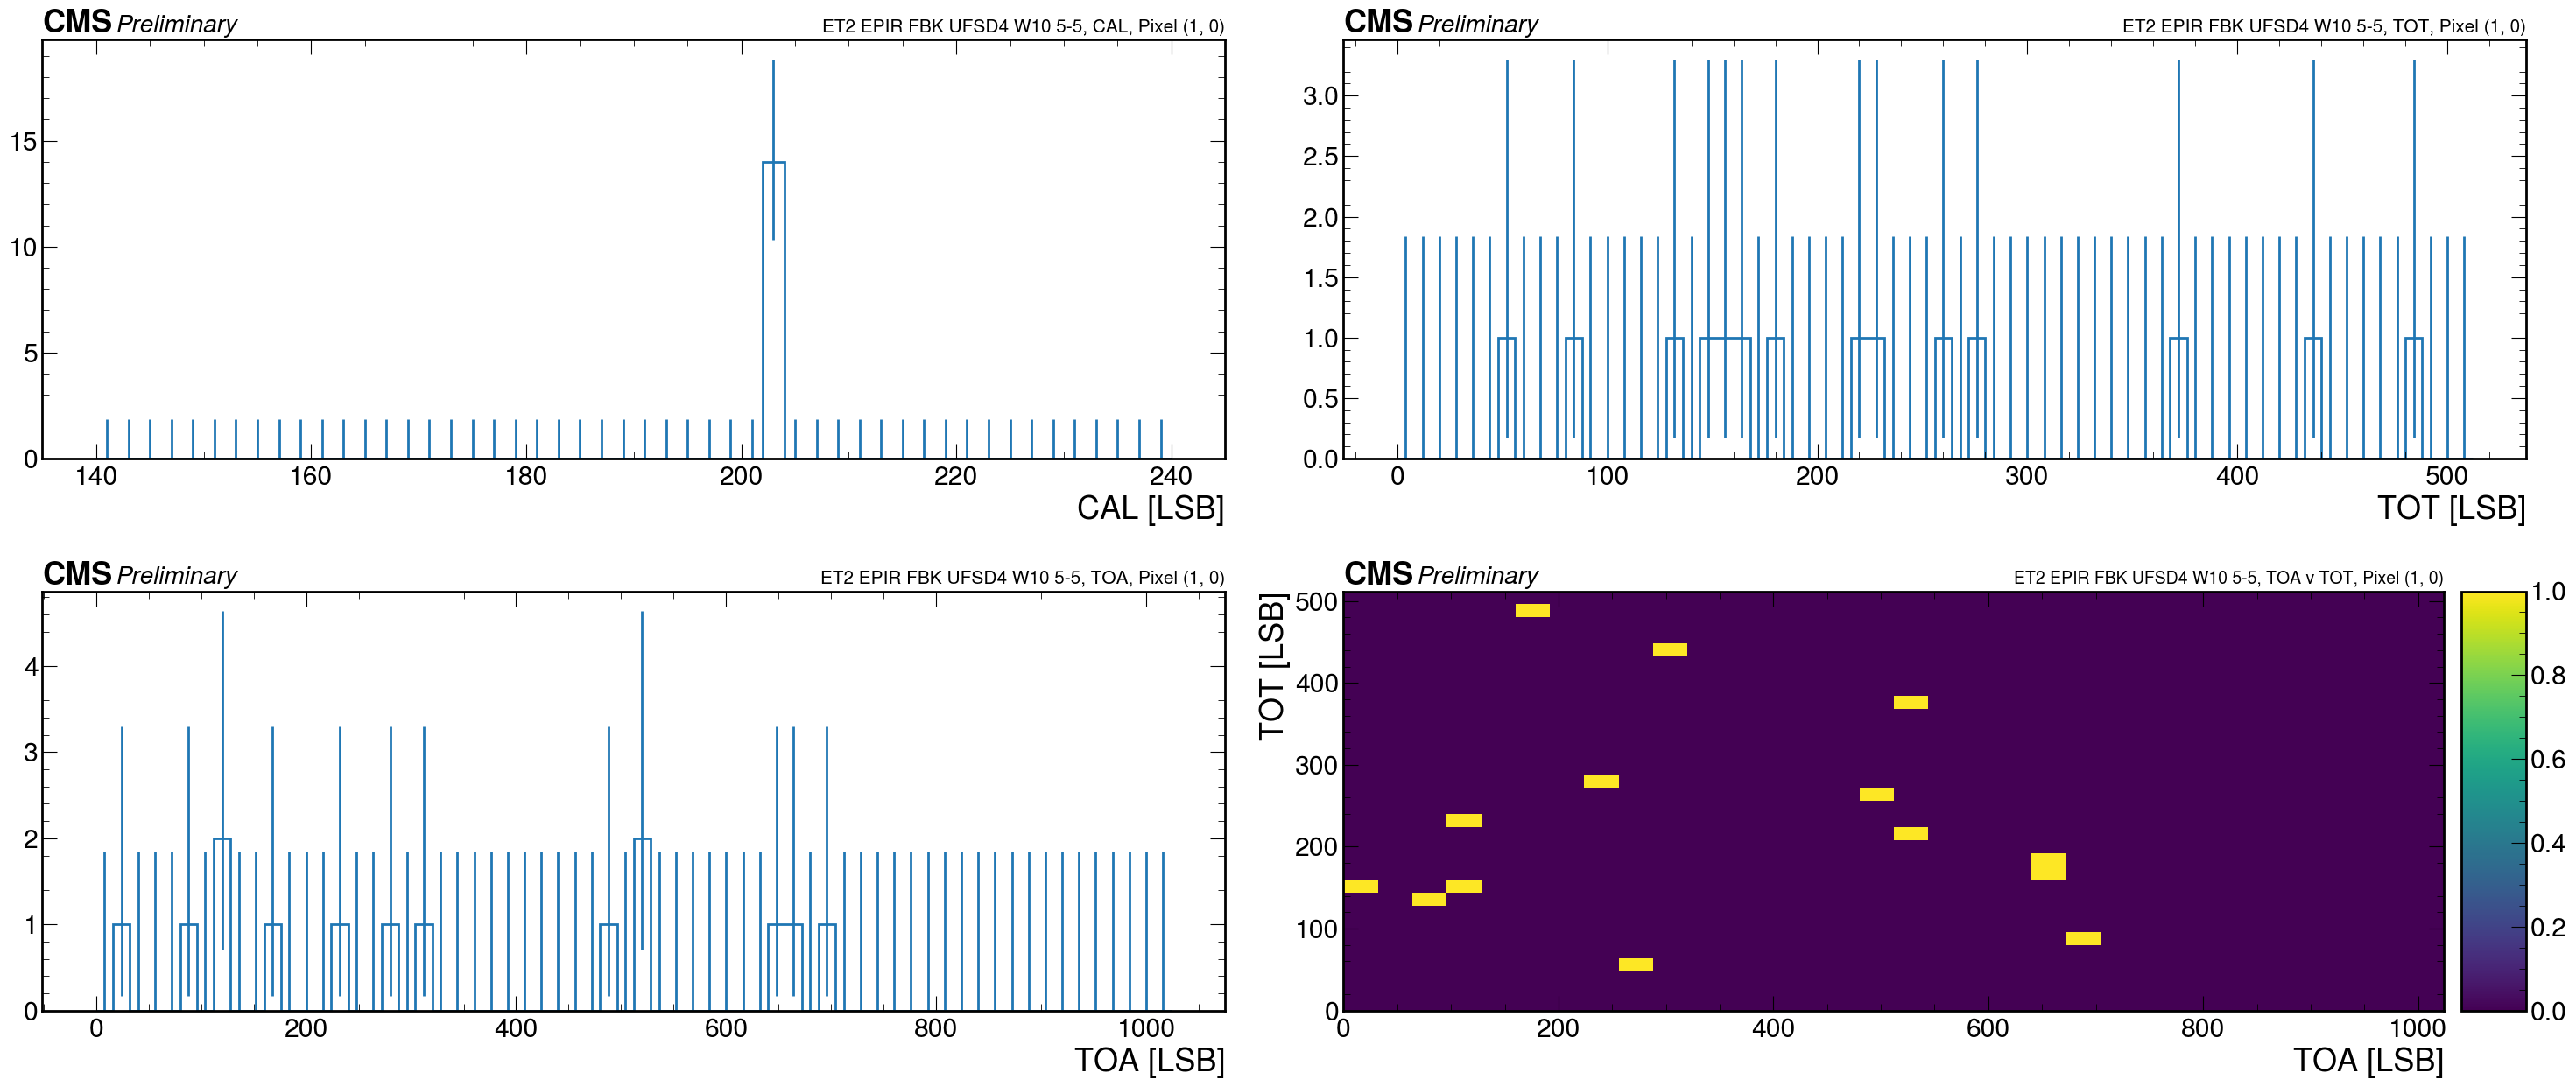

In [13]:
helper.make_pix_inclusive_plots(h_pix_selected, chip_names[0], chip_fignames[0], chip_figtitles[0],
                                fig_path, save=False, show=True, tag="inclusive",
                                title_tag=f", Pixel ({pix_dict[0][0]}, {pix_dict[0][1]})", slide_friendly=True)

In [14]:
pixels = [
    (12, 13),
    (15, 13),
    (11, 14),
    (14, 13),
    (14, 14),
    (5, 13),
    (15, 11),
    (3, 11),
    (15, 15),
    (13, 14),
    (2, 15),
    (12, 14),
    (15, 12),
    (11, 0),
    (15, 14),
    (3, 0),
    (15, 0),
    (6, 15),
    (15, 2),
    (7, 14),
    (1, 12),
    (4, 13),
    (3, 14),
    (0, 15),
    (0, 14),
    (13, 13),
    (5, 2),
    (11, 14),
    (11, 15),
    (6, 14),
    (3, 1),
    (12, 15),
    (9, 13),
    (3, 15),
    (2, 13),
    (6, 1),
    (14, 15),
    (1, 14),
    (7, 15),
    (0, 12),
    (8, 8),
]

print(len(pixels))

df_filtered = df.copy()

for pixel in pixels:
    df_filtered = df_filtered.loc[~((df_filtered['row'] == pixel[0]) & (df_filtered['col'] == pixel[1]))].copy()


41


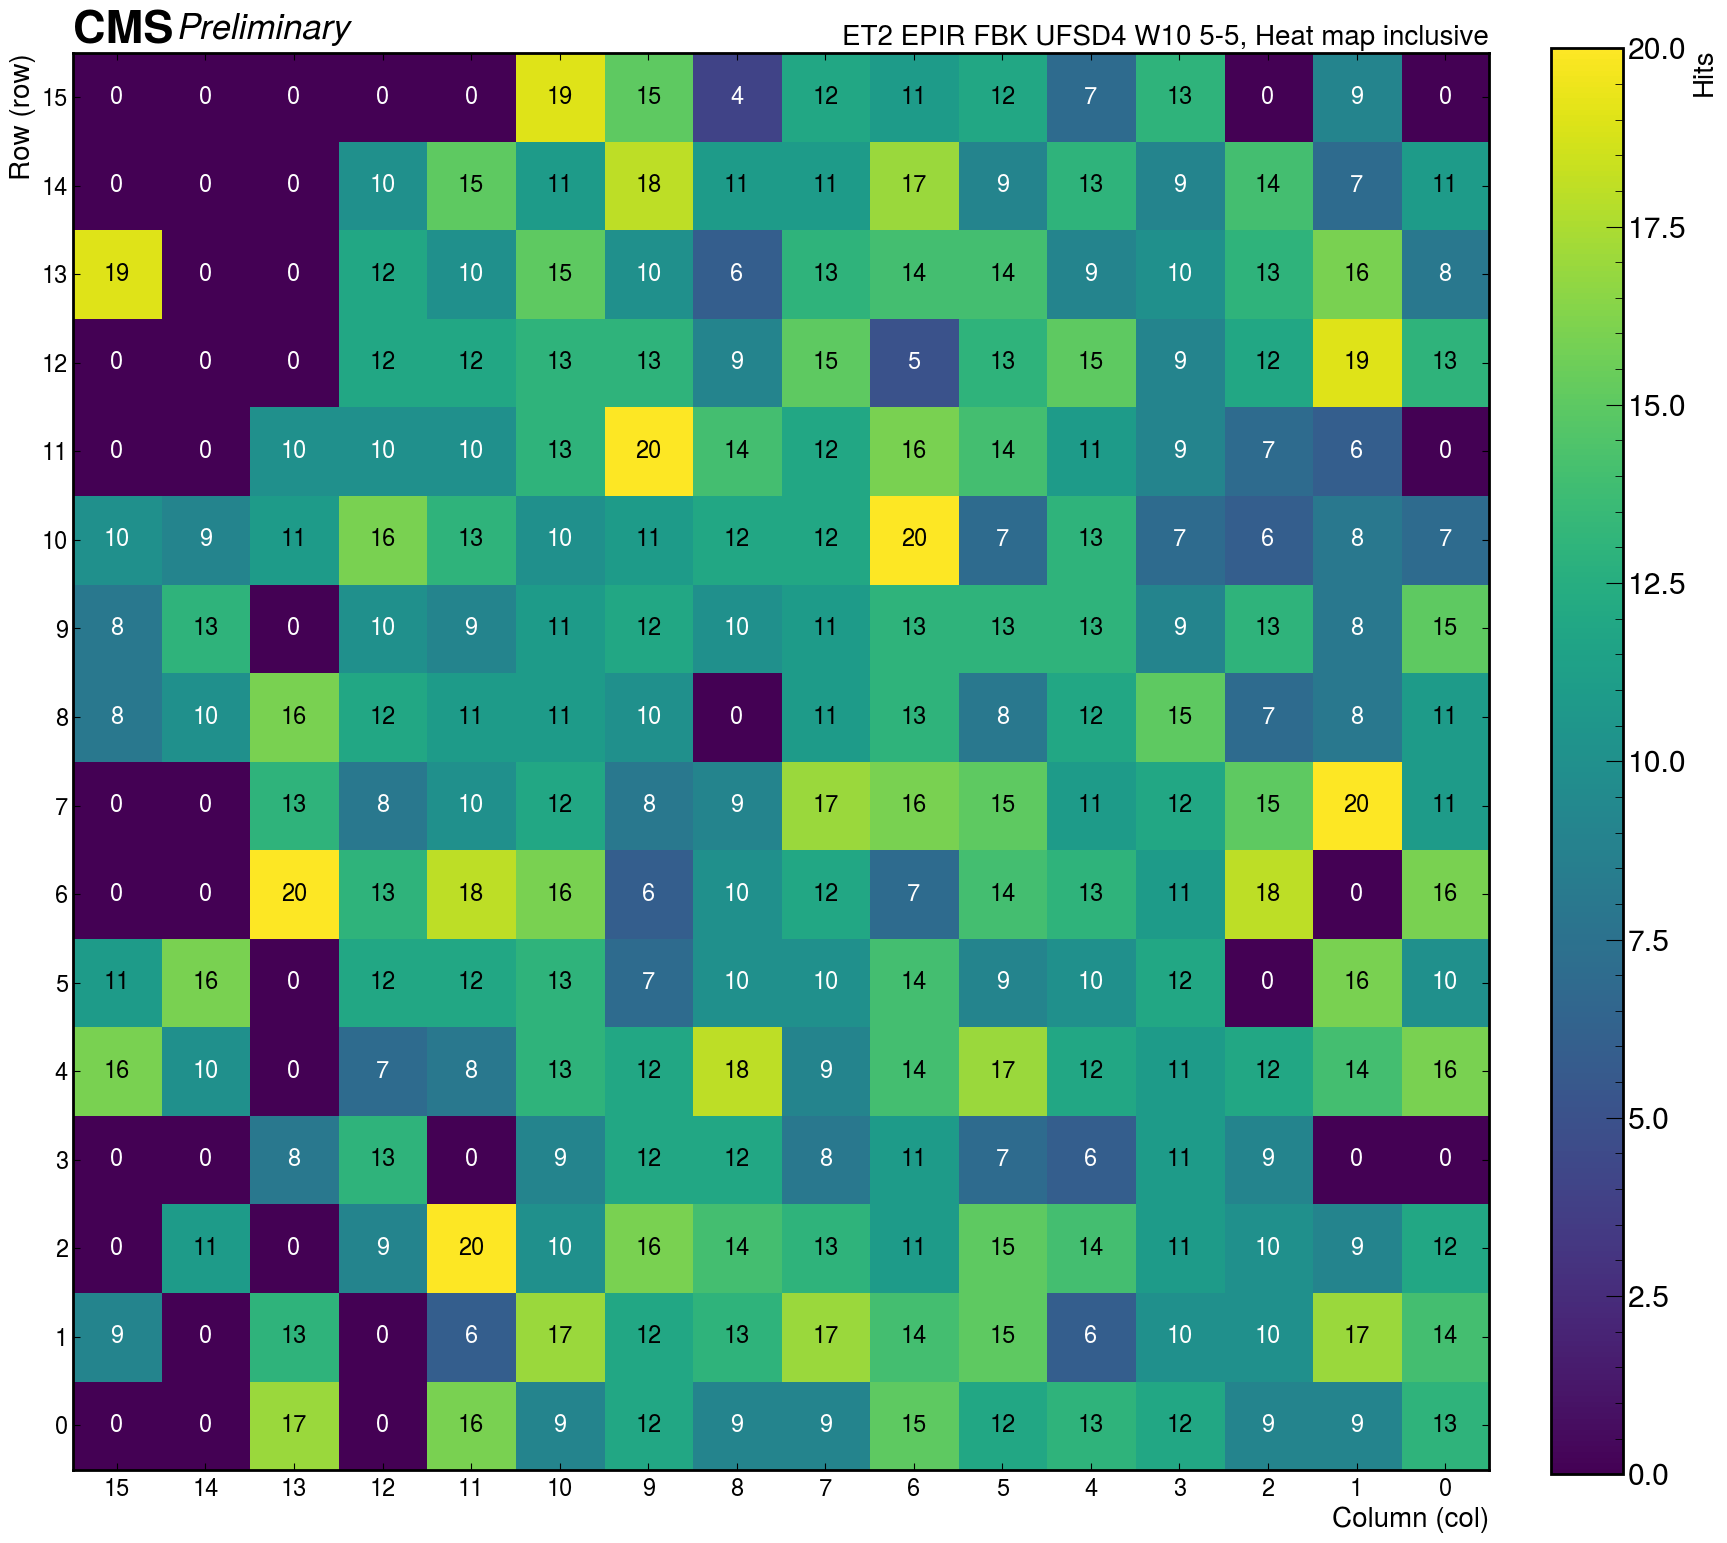

In [15]:
helper.making_heatmap_byPandas(df_filtered, chip_labels, chip_figtitles, "inclusive")

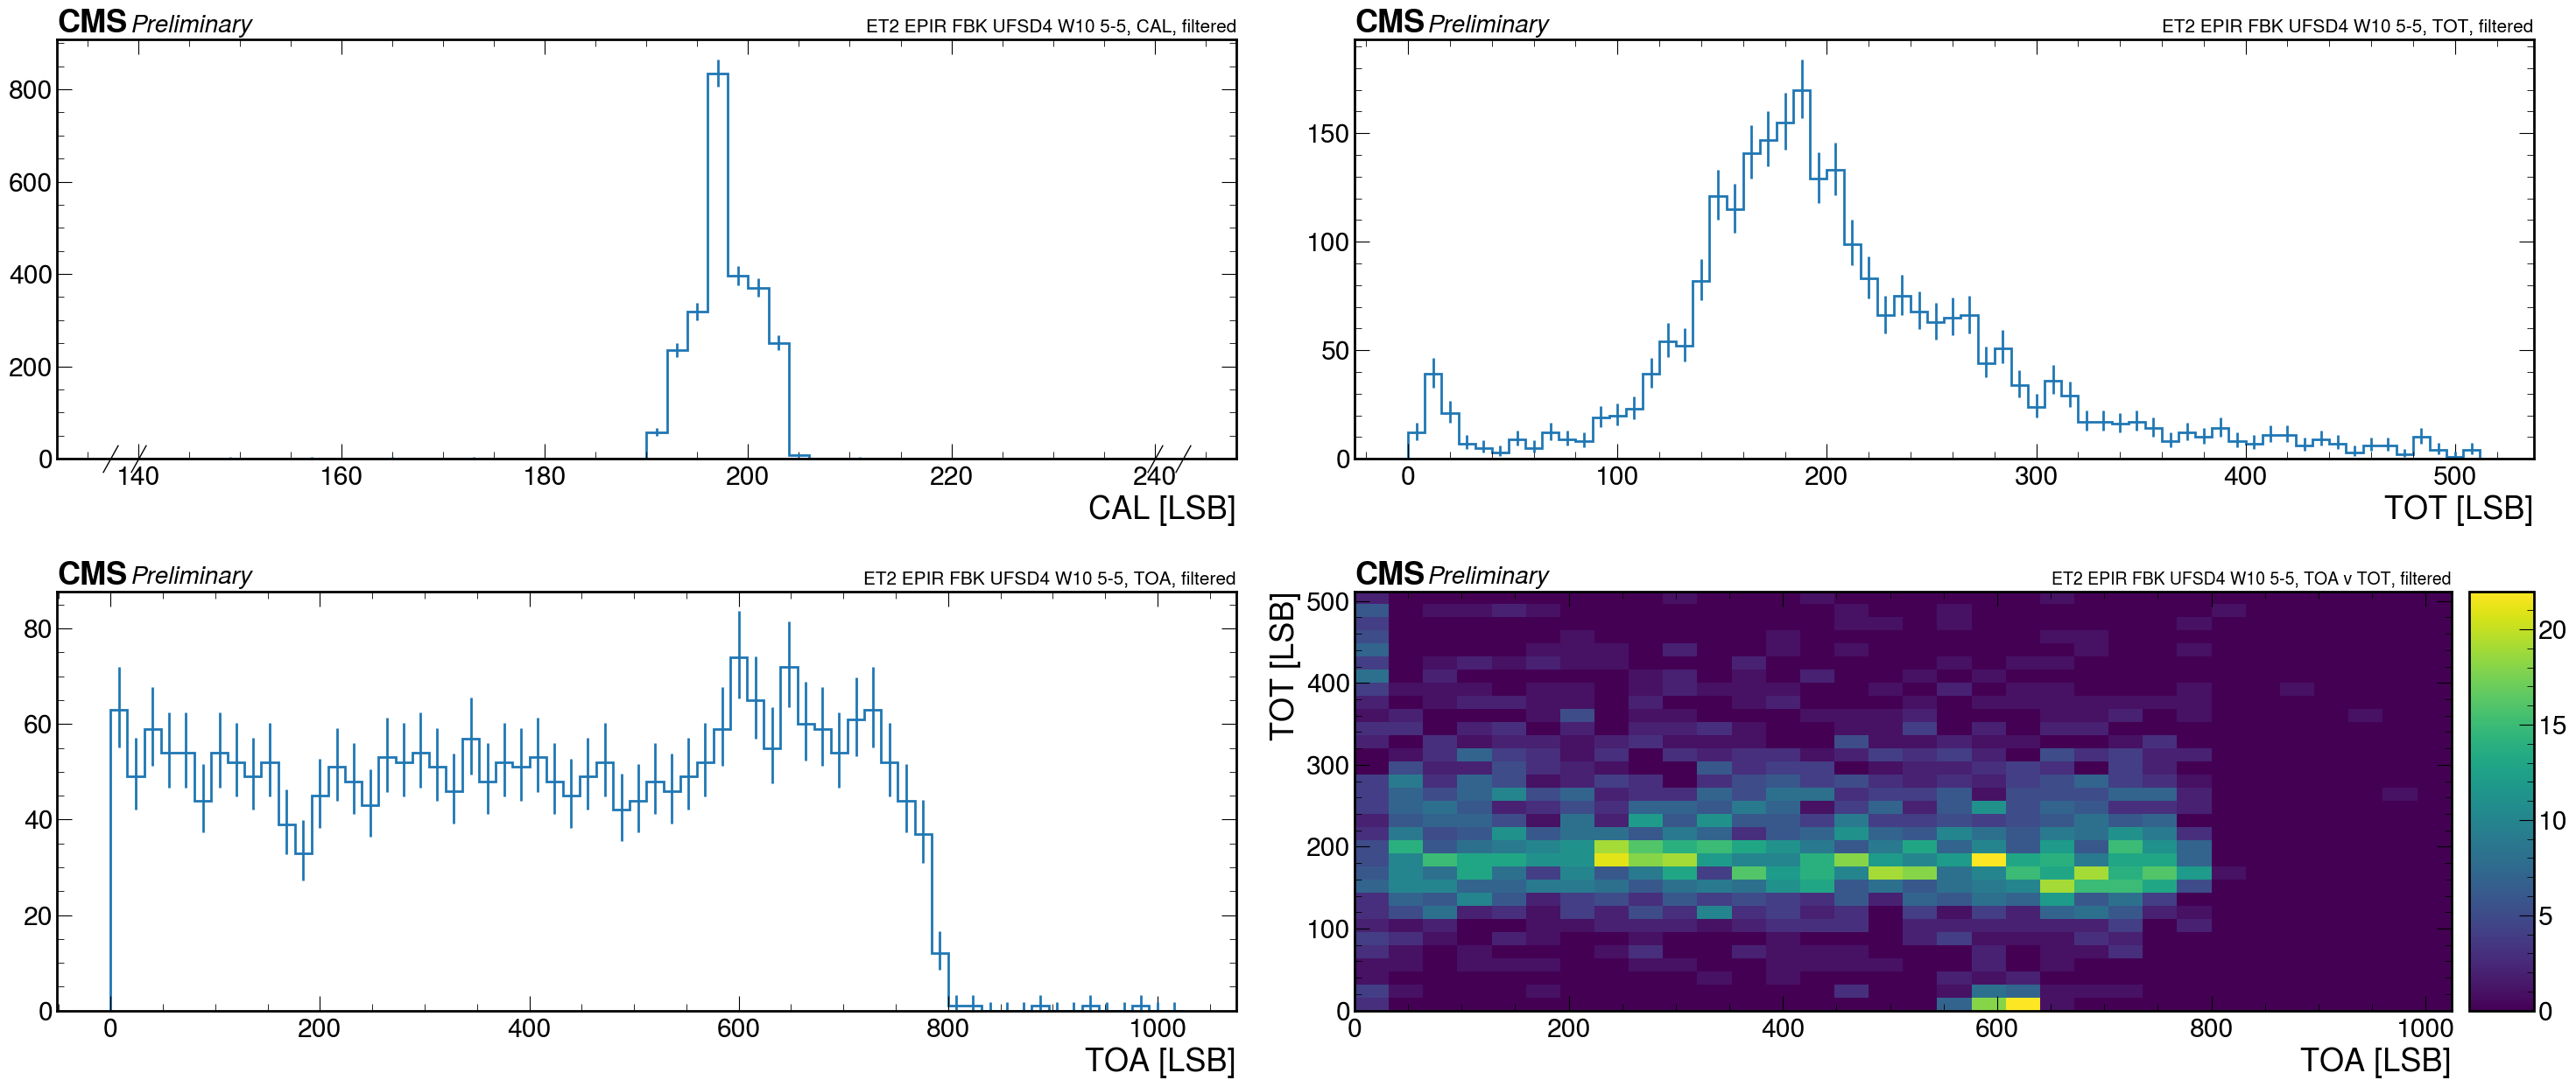

In [16]:
h_filtered = helper.return_hist(df_filtered, chip_names, chip_labels)
helper.make_pix_inclusive_plots(h_filtered, chip_names[0], chip_fignames[0], chip_figtitles[0], 
                                fig_path, save=False, show=True, tag="filtered", title_tag=", filtered", slide_friendly=True)

In [17]:
import time

start = time.time()

In [20]:
now = time.time()
print(now - start)

20.58221435546875


In [21]:
print(start)
print(type(start))

1698432706.1226418
<class 'float'>
